# Analysis

* There is a strong correlation between latitude and temperature. Areas are located closer to Equator have higher temperatures, and areas are located far from Equator have lower temperatures.  
* There is some correlation between humidity and latitude. The scatter plot shows that polar areas (in this example, areas that are closer to the North Pole) have only high level of humidity unlike areas on 20th latitude, where we can see areas with high and low levels of humidity.
* There is no any clear correlation between cloudiness or wind speed and latitude.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
#print(cities)
cities_df = pd.DataFrame(cities, columns=['City'])
cities_df.head()

,City
0,gorontalo
1,ushuaia
2,black diamond
3,aguimes
4,henties bay


In [4]:
cities_df['Latitude'] = ""
cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed'] = ""

cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,gorontalo,,,,,
1,ushuaia,,,,,
2,black diamond,,,,,
3,aguimes,,,,,
4,henties bay,,,,,


## Perform API Calls

In [8]:
row_count = 0
api_key = api_keys.api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#query_url = f"{url}appid={api_key}&units={units}&q="

params = {"units": "imperial", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cities_df.iterrows():

    # get restaurant type from df
    city = row['City']

    # add keyword to params dict
    params['keyword'] = city

    # assemble url and make API request
    #print(f"Retrieving Results for Index {index}: {city}.")
    response = requests.get(query_url + city).json()
    #pprint(response)
    row_count+=1
    try:
        print(f"Working on {city} #{row_count}.")
        print(query_url)

        
        
        cities_df.loc[index, 'Latitude'] = response['coord']['lat']
        cities_df.loc[index, 'Temperature'] = response['main']['temp']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']["all"]
        cities_df.loc[index, 'Wind Speed']= response['wind']['speed']
        
    except (KeyError, IndexError):
        print("Missing result... skipping.")
        
  

Working on gorontalo #1.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on ushuaia #2.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on black diamond #3.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on aguimes #4.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on henties bay #5.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on clyde river #6.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on dotnuva #7.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on kavieng #8.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efe

Working on lebu #63.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on cravo norte #64.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on barra #65.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on hilo #66.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on nikolskoye #67.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on yellowknife #68.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on cururupu #69.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on cajaruro #70.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3

Working on yenagoa #126.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on atuona #127.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on saint-michel-des-saints #128.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on kijang #129.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on yar-sale #130.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on katsuura #131.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on buariki #132.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on abdanan #133.
http://api.openweathermap.or

Working on grindavik #188.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on gazanjyk #189.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on samarai #190.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on nanortalik #191.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on laives #192.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on turukhansk #193.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on mahajanga #194.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on brenham #195.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e3

Working on auki #251.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on khorixas #252.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on puerto madero #253.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on yirol #254.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on benguela #255.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on teya #256.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on katsina #257.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on sistranda #258.
http://api.openweathermap.org/data/2.5/wea

Working on faanui #315.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on dubbo #316.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on kangaatsiaq #317.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on salto #318.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on rio gallegos #319.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on safwah #320.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on nguiu #321.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on esqueda #322.
http://api.open

Working on samalaeulu #378.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on taonan #379.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on rawson #380.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on zolotinka #381.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Missing result... skipping.
Working on alugan #382.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on mosetse #383.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on santa cruz #384.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on san andres #385.
http://a

Working on kunming #440.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on zhicheng #441.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on beringovskiy #442.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on buncrana #443.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on te anau #444.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on esperance #445.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on pitimbu #446.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on san cristobal #447.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c

Working on purpe #503.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on nanakuli #504.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on gbarnga #505.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on chulman #506.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on seymchan #507.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on tucano #508.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on stromness #509.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on sabang #510.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efe

Working on vestmanna #565.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on arenys de mar #566.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on hit #567.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on zyryanka #568.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on eureka #569.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on port hawkesbury #570.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on tilichiki #571.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8e0e330beee4efefe3997eeca68f&units=imperial&q=
Working on vilhena #572.
http://api.openweathermap.org/data/2.5/weather?appid=cf0c8

In [9]:
cities_df['Latitude'].replace('', np.nan, inplace=True)
cities_df.dropna(subset=['Latitude'], inplace=True)
cities_df.count()

City           546
Latitude       546
Temperature    546
Humidity       546
Cloudiness     546
Wind Speed     546
dtype: int64

In [10]:
cities_df.head()

,City,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,gorontalo,0.54,73.48,94,88,1.9
1,ushuaia,-54.81,40.23,69,75,21.92
2,black diamond,50.69,60.8,36,1,17.22
3,aguimes,27.91,77,61,40,29.97
4,henties bay,-22.12,58.72,89,0,2.68


# Temperature (F) vs Latitude

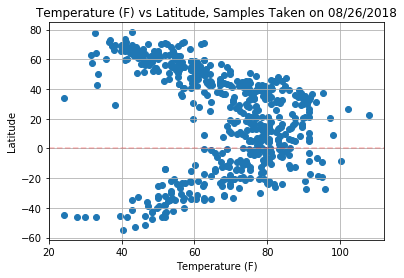

In [11]:
plt.scatter(cities_df['Temperature'], cities_df['Latitude'], marker="o")

plt.title("Temperature (F) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Temperature (F)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Temperature_vs_Latitude.png")

# Show plot
plt.show()

# Humidity (%) vs Latitude

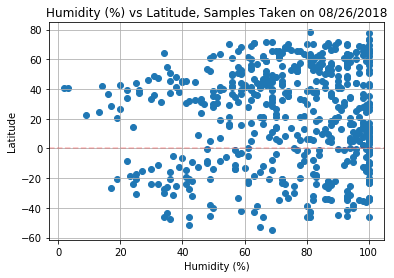

In [12]:
plt.scatter(cities_df['Humidity'], cities_df['Latitude'], marker="o")

plt.title("Humidity (%) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

# Cloudiness (%) vs Latitude

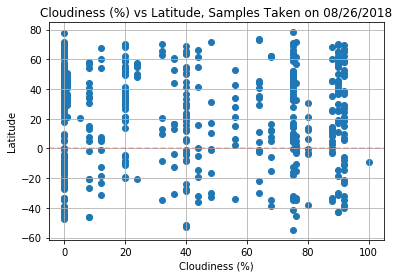

In [13]:
plt.scatter(cities_df['Cloudiness'], cities_df['Latitude'], marker="o")

plt.title("Cloudiness (%) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

# Wind Speed (mph) vs Latitude

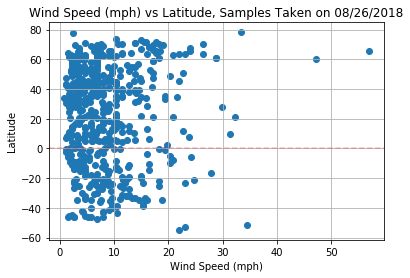

In [14]:
plt.scatter(cities_df['Wind Speed'], cities_df['Latitude'], marker="o")

plt.title("Wind Speed (mph) vs Latitude, Samples Taken on 08/26/2018")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid(True)
plt.axhline(0, color='r', ls='--', alpha = 0.25)
# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

In [15]:
cities_df.to_csv("cities.csv", encoding="utf-8", index=False)